In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./Dataset/labeled_data.csv")

In [3]:
df.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
7629,7845,3,1,2,0,1,All these bitches &amp; niggas be Trippin offa...
18213,18618,3,0,3,0,1,RT @Yung_bootylord: Everybody think i get hoes...
7478,7690,3,0,3,0,1,AHHH karmas a bitch
6208,6386,3,0,0,3,2,"@jacquebland Weird to see a local yokel ""journ..."
22323,22794,3,0,3,0,1,Tym 2 lyt dis blunt n holla @ hoes.


In [4]:
# df['class'] = (df['class']//2)
df['class'].replace((0,1,2),(1,1,0),inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
df = df[['tweet' , 'class']]

In [7]:
df

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [8]:
df.isnull().sum()

tweet    0
class    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(24783, 2)

In [11]:
df['class'].value_counts()

1    20620
0     4163
Name: class, dtype: int64

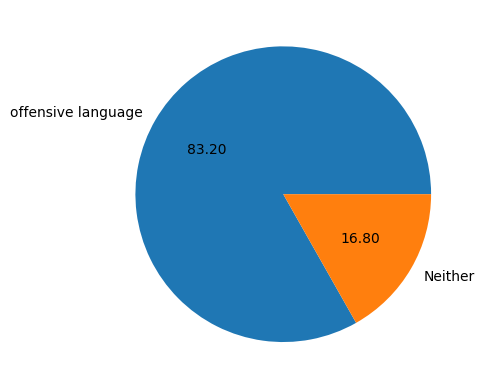

In [12]:
import matplotlib.pyplot as plt

plt.pie(
    df["class"].value_counts(),
    labels=["offensive language", "Neither"],
    autopct="%0.2f",
)
plt.show()

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
df["num_characters"] = df["tweet"].apply(len)

In [16]:
df["num_words"] = df["tweet"].apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
df["num_sentences"] = df["tweet"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,24783.000000,24783.000000,24783.000000
mean,85.436065,19.950974,1.396845
std,41.548238,11.849239,0.782960
min,5.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,81.000000,18.000000,1.000000
75%,119.000000,27.000000,2.000000
max,754.000000,321.000000,42.000000


In [19]:
df[df["class"] == 0][["num_characters", "num_words", "num_sentences"]].describe()


,num_characters,num_words,num_sentences
count,4163.000000,4163.000000,4163.000000
mean,94.850108,21.016815,1.576988
std,41.054325,10.928020,1.048336
min,7.000000,1.000000,1.000000
25%,60.000000,13.000000,1.000000
50%,97.000000,21.000000,1.000000
75%,132.000000,28.000000,2.000000
max,522.000000,274.000000,42.000000


In [20]:
df[df["class"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,20620.000000,20620.00000,20620.000000
mean,83.535451,19.73579,1.360475
std,41.389241,12.01545,0.712099
min,5.000000,1.00000,1.000000
25%,50.000000,11.00000,1.000000
50%,78.000000,18.00000,1.000000
75%,115.000000,27.00000,2.000000
max,754.000000,321.00000,17.000000


In [21]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

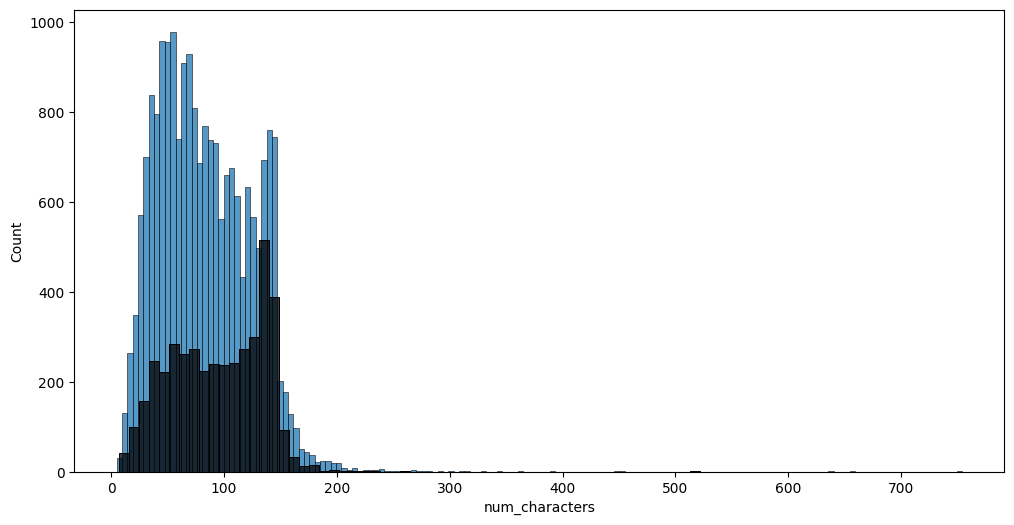

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["class"] == 1]["num_characters"])
sns.histplot(df[df["class"] == 0]["num_characters"], color="black")


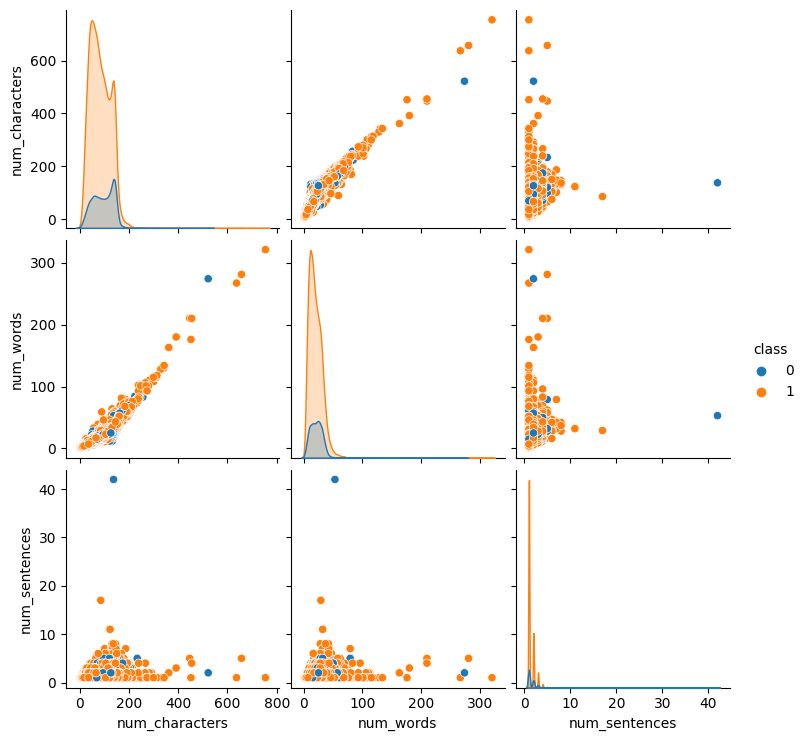

In [23]:
sns.pairplot(df , hue='class')

<Axes: >

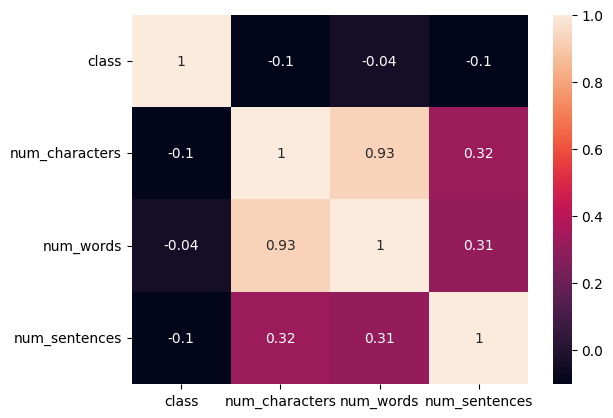

In [24]:
my_df = df.select_dtypes(exclude=[object])
sns.heatmap(my_df.corr(), annot=True)

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


In [27]:
from nltk.stem.porter import PorterStemmer
import re

# other_exclusions = ["#ff", "ff", "rt"]
# stopwords.extend(other_exclusions)
# stemmer = PorterStemmer()
tweet=df.tweet
import string

In [28]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):

    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')

    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()

    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())

    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])

    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet

    return tweets_p

processed_tweets = preprocess(tweet)

df['processed_tweets'] = processed_tweets

<ipython-input-28-2f367b3d8150>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-28-2f367b3d8150>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=punc_remove.str.replace(r'\s+', ' ')
<ipython-input-28-2f367b3d8150>:33: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-28-2f367b3d8150>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


In [29]:
df.sample()

,tweet,class,num_characters,num_words,num_sentences,processed_tweets
24708,will u sell dat pussy for me?,1,29,8,1,u sell dat pussi


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

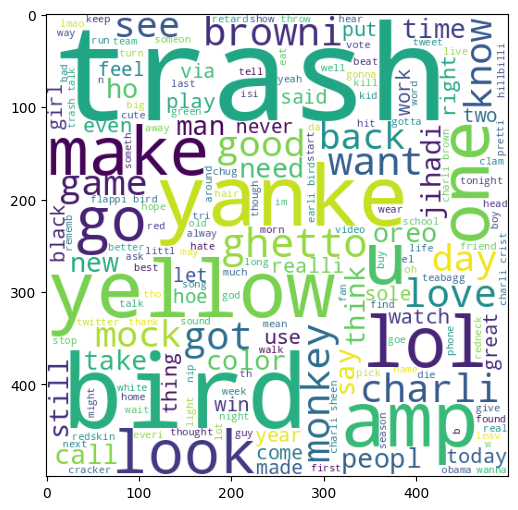

In [31]:
hate_wc = wc.generate(df[df["class"] == 0]["processed_tweets"].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(hate_wc)

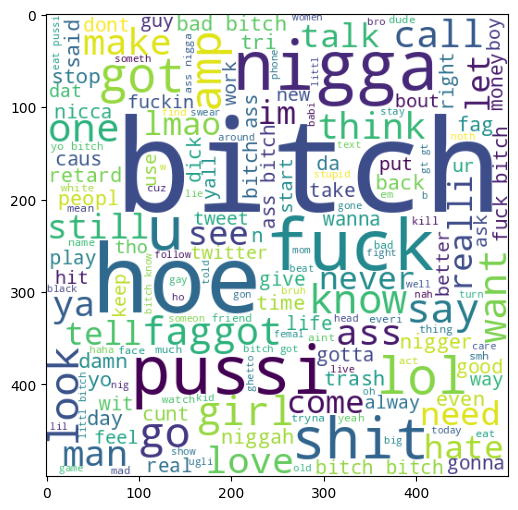

In [32]:
hate_wc = wc.generate(df[df["class"] == 1]["processed_tweets"].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(hate_wc)

In [33]:
df.head()

,tweet,class,num_characters,num_words,num_sentences,processed_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,140,34,4,woman complain clean hous amp man alway take t...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,85,26,4,boy dat cold tyga dwn bad cuffin dat hoe st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,120,35,5,dawg ever fuck bitch start cri confus shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,62,20,3,look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,137,43,3,shit hear might true might faker bitch told ya


In [34]:
hate_corpus = []
for msg in df[df["class"] == 1]["processed_tweets"].tolist():
    for word in msg.split():
        hate_corpus.append(word)

nohate_corpus = []
for msg in df[df["class"] == 0]["processed_tweets"].tolist():
    for word in msg.split():
        nohate_corpus.append(word)

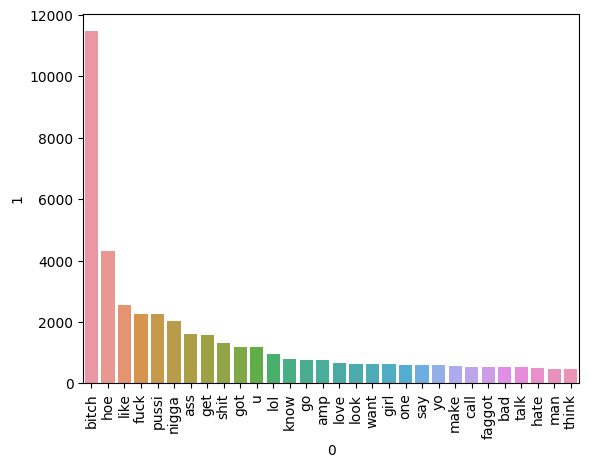

In [35]:
from collections import Counter

sns.barplot(
    x = pd.DataFrame(Counter(hate_corpus).most_common(30))[0],
    y = pd.DataFrame(Counter(hate_corpus).most_common(30))[1]
)
plt.xticks(rotation="vertical")
plt.show()

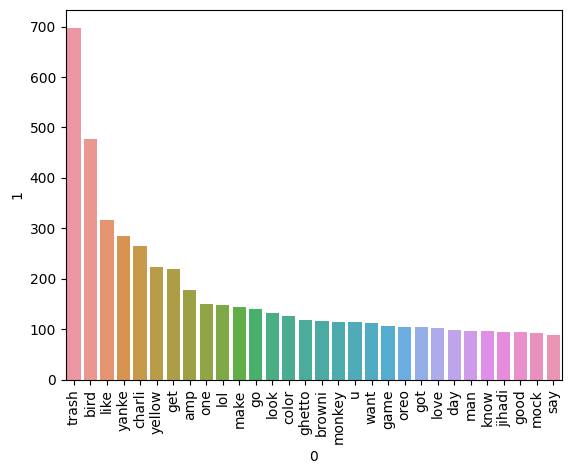

In [36]:
sns.barplot(
    x = pd.DataFrame(Counter(nohate_corpus).most_common(30))[0],
    y = pd.DataFrame(Counter(nohate_corpus).most_common(30))[1]
)
plt.xticks(rotation="vertical")
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=5000)
# tfidf = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

In [38]:
X = tfidf.fit_transform(df['processed_tweets']).toarray()

In [39]:
X.shape

(24783, 5000)

In [40]:
y = df['class'].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1 ))
print(recall_score(y_test , y_pred1))


0.7641718781521081
[[ 704  150]
 [1019 3084]]
0.9536178107606679
0.7516451377041189


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [48]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1 ))
print(recall_score(y_test , y_pred1))

0.9035707080895703
[[ 415  439]
 [  39 4064]]
0.9025094381523429
0.9904947599317573


In [49]:
lrc.fit(X_train, y_train)
y_pred1 = lrc.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1 ))
print(recall_score(y_test , y_pred1))

0.9576356667339117
[[ 799   55]
 [ 155 3948]]
0.9862603047714215
0.9622227638313429


In [50]:
dtc.fit(X_train, y_train)
y_pred1 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1 ))
print(recall_score(y_test , y_pred1))

0.8591890256203348
[[ 841   13]
 [ 685 3418]]
0.9962110171961527
0.8330489885449671


In [51]:
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1 ))
print(recall_score(y_test , y_pred1))

0.9540044381682469
[[ 772   82]
 [ 146 3957]]
0.9796979450359
0.9644162807701682


In [52]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1 ))
print(recall_score(y_test , y_pred1))

0.9394795239055881
[[ 724  130]
 [ 170 3933]]
0.9680039379768643
0.9585669022666342


In [53]:
# test = ""
# x = tfidf.transform([test]).toarray()
# print(lrc.predict(x))

[0]


In [55]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl','wb'))
pickle.dump(lrc,open('model.pkl' , 'wb'))